In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


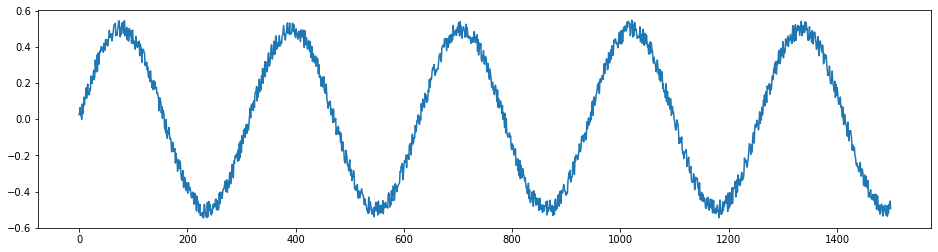

In [2]:
N=1500
t=np.arange(0,N)
data_sine=np.sin(0.02*t)/2+np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_sine)
plt.show()


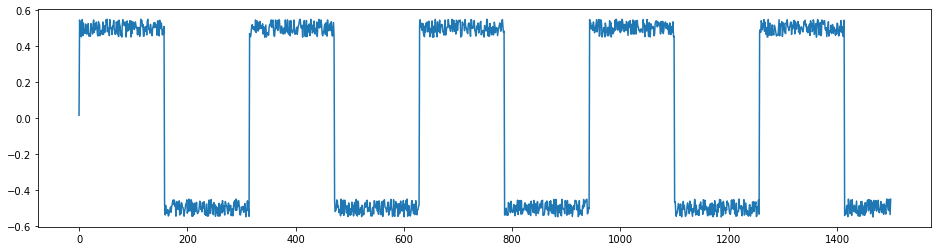

In [3]:
data_square=np.sign(np.sin(0.02*t))/2+np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_square)
plt.show()


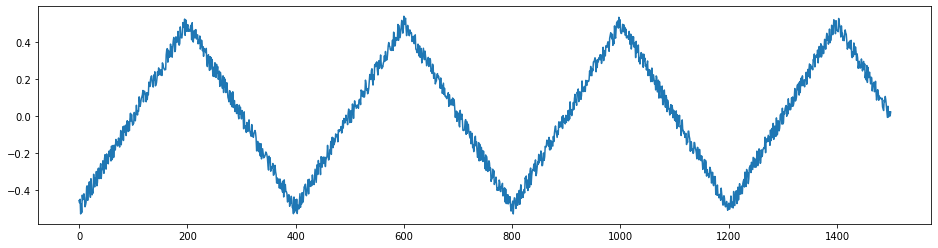

In [4]:
P=200
A=2
data_tringle=((A/P)* (P-np.abs(t%(2*P)-P))-1)/2 +np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(16,4))
plt.plot(data_tringle)
plt.show()

In [5]:
from re import S
def convertsignaltodataset(signal,step,label):
  X=[]
  Y=[]
  for i in range(len(signal)-step):
    j=i+step
    X.append(signal[i:j])
    Y.append(label)
  return np.array(X),np.array(Y)


In [6]:
X_sine,Y_sine=convertsignaltodataset(data_sine,40,label=0)
X_square,Y_square=convertsignaltodataset(data_square,40,label=1)
X_tringle,Y_tringle=convertsignaltodataset(data_tringle,40,label=2)

In [7]:
X=np.concatenate((X_sine,X_square,X_tringle),axis=0)
Y=np.concatenate((Y_sine,Y_square,Y_tringle),axis=0)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [8]:
X_train.shape

(3504, 40)

In [9]:
X_train=X_train[...,np.newaxis]
X_test=X_test[...,np.newaxis]

In [10]:
print(X_test.shape)

(876, 40, 1)


In [11]:
model=tf.keras.models.Sequential([layers.SimpleRNN(units=64,input_shape=(None,1))
,layers.Dense(3,activation="softmax")])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train,epochs=200,batch_size=16)

Epoch 1/200
219/219 [==============================] - 2s 7ms/step - loss: 0.9586 - accuracy: 0.5014
Epoch 2/200
219/219 [==============================] - 2s 7ms/step - loss: 0.8673 - accuracy: 0.5519
Epoch 3/200
219/219 [==============================] - 1s 7ms/step - loss: 1.0214 - accuracy: 0.4324
Epoch 4/200
219/219 [==============================] - 1s 7ms/step - loss: 0.8140 - accuracy: 0.5979
Epoch 5/200
219/219 [==============================] - 3s 12ms/step - loss: 0.7813 - accuracy: 0.5973
Epoch 6/200
219/219 [==============================] - 3s 13ms/step - loss: 0.7150 - accuracy: 0.6370
Epoch 7/200
219/219 [==============================] - 3s 13ms/step - loss: 0.7053 - accuracy: 0.6387
Epoch 8/200
219/219 [==============================] - 3s 13ms/step - loss: 0.6249 - accuracy: 0.6775
Epoch 9/200
219/219 [==============================] - 3s 14ms/step - loss: 0.6298 - accuracy: 0.6915
Epoch 10/200
219/219 [==============================] - 2s 8ms/step - loss: 0.5839 - a

In [14]:
model.evaluate(X_test,Y_test)

28/28 [==============================] - 0s 3ms/step - loss: 1.0811 - accuracy: 0.3779


[1.0811034440994263, 0.3778538703918457]

inference